# 7.8.1 Polynomial Regression and Step Functions

In [1]:
library(ISLR2)
attach(Wage)

We will examine how Figure 7.1 was produced

In [2]:
fit <- lm(wage ~ poly(age, 4), data = Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


This fits a linear model, using the `lm()` function, in order to predict `wage` using a fourth-degree polynomial in `age: poly(age, 4)`. The `poly()` function returns a mtrix whose columns are a basis of _orthogonal polynomials_, which essentially means that each column is a linear combination of the variables `age`, `age^2`, `age^3`, and `age^4`.

We can obtain `age`, `age^2`, `age^3`, and `age^4` directly by using `raw = TRUE`

In [3]:
fit2 <- lm(wage ~ poly(age, 4, raw = T), data = Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


Here is yet another way of fitting the same model:

In [4]:
fit2a <- lm(wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage)
coef(fit2a)

(Intercept)           age      I(age^2)      I(age^3)      I(age^4) 
-1.841542e+02  2.124552e+01 -5.638593e-01  6.810688e-03 -3.203830e-05

And yet another way of fitting the same model:

In [5]:
fit2b <- lm(wage ~ cbind(age, age^2, age^3, age^4), data = Wage)
coef(fit2b)

(Intercept) cbind(age, age^2, age^3, age^4)age 
                     -1.841542e+02                       2.124552e+01 
   cbind(age, age^2, age^3, age^4)    cbind(age, age^2, age^3, age^4) 
                     -5.638593e-01                       6.810688e-03 
   cbind(age, age^2, age^3, age^4) 
                     -3.203830e-05

In [6]:
agelims <- range(age)
age.grid <- seq(from = agelims[1], to = agelims[2])
preds <- predict(fit, newdata = list(age = age.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se.fit, preds$fit - 2 * preds$se.fit)

The following will plot the data.

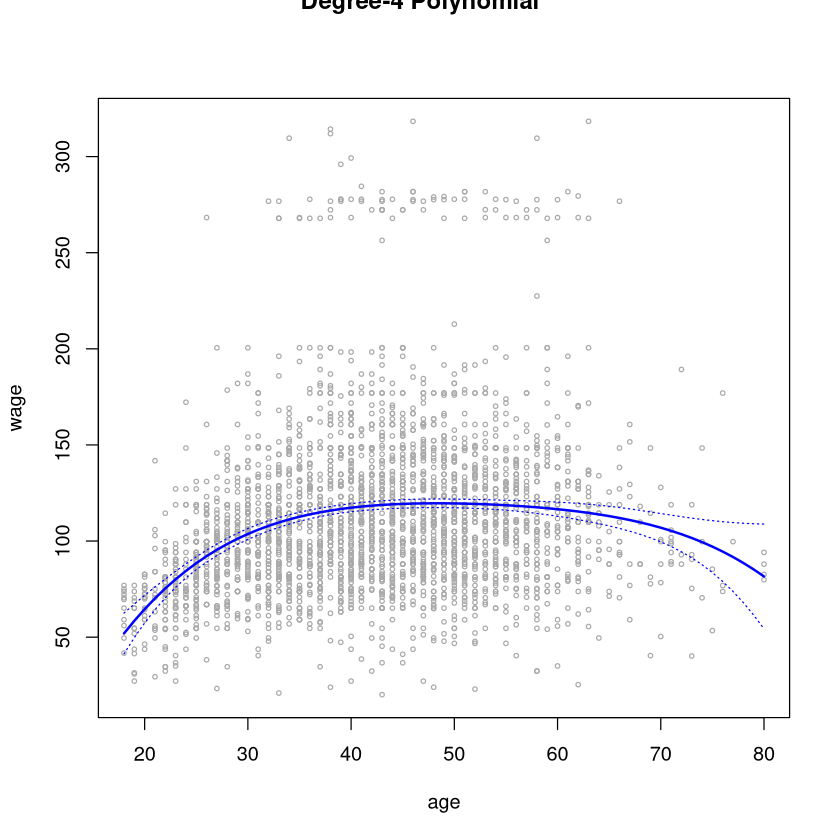

In [7]:
#par(mfrow = c(1, 2), mar = c(4.5, 4.5, 1, 1), oma = c(0, 0, 4, 0))
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Degree-4 Polynomial", outer = T)
lines(age.grid, preds$fit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

We mentioned before that whether or not an orthogonal set of basis functions is produced in the `poly()` function will not affect the model obtained in a meaningful way. What de we mean by this? The fitted values obtained in either case are identical.

In [8]:
preds2 <- predict(fit2, newdata = list(age = age.grid), se = TRUE)
max(abs(preds$fit - preds2$fit))

[1] 1.641354e-12

In performing a polynomial regression we must decide on the degree of the polynomial to use. One way to do this is by using hypothesis tests. We now fit models ranging from linear to a dgree-5 polynomial and seek to determine the simplest model which is sufficient to explain the relationship between `wage` and `age`. We use the `anova()` function, which performs an _analysis of variance_ (ANOVA, using an F-test) in order to test the null hypothesis that a model $\cal{M}_1$ is sufficient to explain the data against the alternative hypothesis that a more complex model $\cal{M}_2$ is required. In order to use the `anova()` function, $\cal{M}_1$ and $\cal{M}_2$ must be _nested_ models: the predictors in $\cal{M}_1$ must be a subset of the predictors in $\cal{M}_2$. In this case we fit five different models and sequentially compare the simpler model to the more complex model.

In [9]:
fit.1 <- lm(wage ~ age, data = Wage)
fit.2 <- lm(wage ~ poly(age, 2), data = Wage)
fit.3 <- lm(wage ~ poly(age, 3), data = Wage)
fit.4 <- lm(wage ~ poly(age, 4), data = Wage)
fit.5 <- lm(wage ~ poly(age, 5), data = Wage)
anova(fit.1, fit.2, fit.3, fit.4, fit.5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2998,5022216,NA,NA,NA,NA
2,2997,4793430,1,228786.010,143.5931074,2.367734e-32
3,2996,4777674,1,15755.694,9.8887559,1.679213e-03
4,2995,4771604,1,6070.152,3.8098134,5.104623e-02
5,2994,4770322,1,1282.563,0.8049758,3.696820e-01


The p-value compairng the linear `Moedl 1` to the quadratic `Model 2` is essentially zero ($<10^{-15}$), indicating that a linear fit is not sufficient.  Similarly the p-value comparing the quadratic `Model 2` to the cubic `Model 3` is very low ($0.0017$), so the quadratic fit is also insufficient. The p-value compairing the cubic and degree-4 polynomials, `Model 3` and `Model 4`, is approximately $5\%$ while the degree-5 polynomial `Model 5` seems unnecessary because its p-value is $0.37$. Hence, either a cubic or a quartic polynomial appear to provide a reasonable fit to the data, but lower- or higher-order models are not justified.  

In this case, instead of using the `anova()` function, we could have obtained these p-values more succinctly by exploiting the fact that `poly()` creates orthognal polynomials.

In [10]:
coef(summary(fit.5))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


Notice that the p-values are the same, and in fact the square of the _t_-statistics are equal to the F-statistics from the `anova()` function.

In [11]:
(-11.9830341)^2

[1] 143.5931

However, the ANOVA method works whether or not we used orthogonal polynomials; it also works when we have other terms in the model as well. For example, we can use `anova()` to compare these three models:

In [12]:
fit.1 <- lm(wage ~ education + age, data = Wage)
fit.2 <- lm(wage ~ education + poly(age, 2), data = Wage)
fit.3 <- lm(wage ~ education + poly(age, 3), data = Wage)
anova(fit.1, fit.2, fit.3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2994,3867992,NA,NA,NA,NA
2,2993,3725395,1,142597.10,114.696898,2.728971e-26
3,2992,3719809,1,5586.66,4.493588,3.410431e-02


As an alternative to using hypothesis tests and ANOVA, we could choose the polynomial degree using cross-validation, as discussed in Chapter 5.

Next we consider the task of predicting whether an individual earns more than $\$250,000$ per year. We proceed much as before, except that first we create the appropriate response vector, and then apply the `glm()` function using `family = "binomial"` in order to fit a polynomial logistic regression model.

In [13]:
fit <- glm(I(wage > 250) ~ poly(age, 4), data = Wage, family = binomial)

Note that we agian use the wrapper `I()` to create this binary response variable on the fly. The expression `wage > 250` evaluates to a logical variable containing `TRUE`s and `FALSE`s, which `glm()` coerces to binary by setting the `TRUE`s to 1 and the `FALSE`s to 0.  
We make predictions using the `predict()` function.

In [14]:
preds <- predict(fit, newdata = list(age = age.grid), se = T)

Calculating the confidence intervals is slightly more involved than in the linear regression case. The default prediction type for a `glm()` model is `type = "link"`, which is what we use here. This means we get predictions for the _logit_, or log-odds: that is, we have fit a model of the form
\begin{align}
\log{\left( \frac{\text{Pr}(Y=1|X)}{1 - \text{Pr}(Y=1|X)} \right)} = X \beta \text{,}
\end{align}
and the predictions given are of the form $X\hat{\beta}$. The standard errors given are also for $X\hat{\beta}$. In order to obtain confidence intervals for $\text{Pr}(Y=1|X)$, we use the transformation
\begin{align}
\text{Pr}(Y=1|X) = \frac{ e^{X \beta} }{ 1 + e^{X \beta} }\text{.}
\end{align}

In [15]:
pfit <- exp(preds$fit) / (1 + exp(preds$fit))
se.bands.logit <- cbind(preds$fit + 2 * preds$se.fit,
    preds$fit - 2 * preds$se.fit)
se.bands <- exp(se.bands.logit) / (1 + exp(se.bands.logit))

Note that we could have directly computed the probabilities by selecting `type = "response"` option in the `predict()` function.

In [16]:
preds <- predict(fit, newdata = list(age = age.grid),
    type = "response", se = T)

However, the corresponding confidence intervals would not have been sensible because we would end up with negative probabilities!  

Finally, the right-hand plot from Figure 7.1 was made as follows:

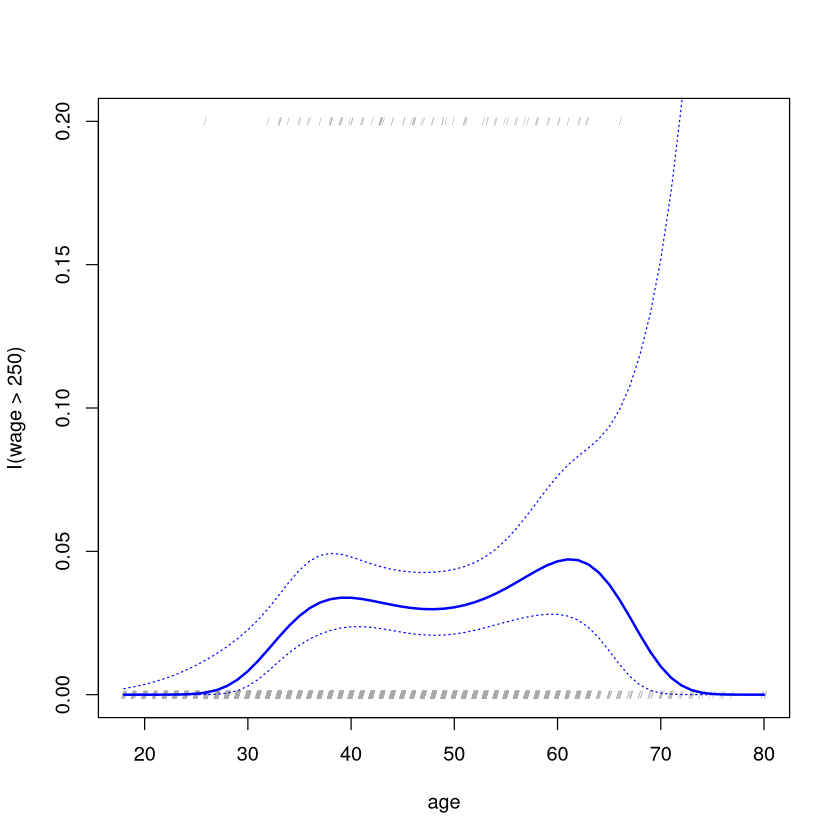

In [17]:
plot(age, I(wage > 250), xlim = agelims, type = "n",
    ylim = c(0, .2))
points(jitter(age), I((wage > 250) / 5), cex = .5, pch = "/",
    col = "darkgrey")
lines(age.grid, pfit, lwd = 2, col = "blue")
matlines(age.grid, se.bands, lwd = 1, col = "blue", lty = 3)

In order to fit a step function, as discussed in Section 7.2, we use the `cut()` function.

In [18]:
table(cut(age, 4))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

In [19]:
fit <- lm(wage ~ cut(age, 4), data = Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


Here the `cut()` function automatically picked the cutpoints at $33.5$, $49$, and $64.5$ years of age. We could also have specified our own cutpoints directly using the `breaks` option. The function `cut()` returns an ordered categorical variable; the `lm()` function then creates a set of dummy variables for use in the regression. The `age < 33.5` category is left out, so the intercept coefficient of $\$94,160$ can be interpreted as the average salary for those under 33.5 years of age, and the other coefficients can be interpreted as the average additional salary for those in the other age groups. We can produce predictions and plots just as we didi in the case of the polynomial fit.

In [20]:
agelims <- range(age)
age.grid <- seq(from = agelims[1], to = agelims[2])
preds <- predict(fit, newdata = list(age = age.grid), se = TRUE)
se.bands <- cbind(preds$fit + 2 * preds$se.fit, preds$fit - 2 * preds$se.fit)

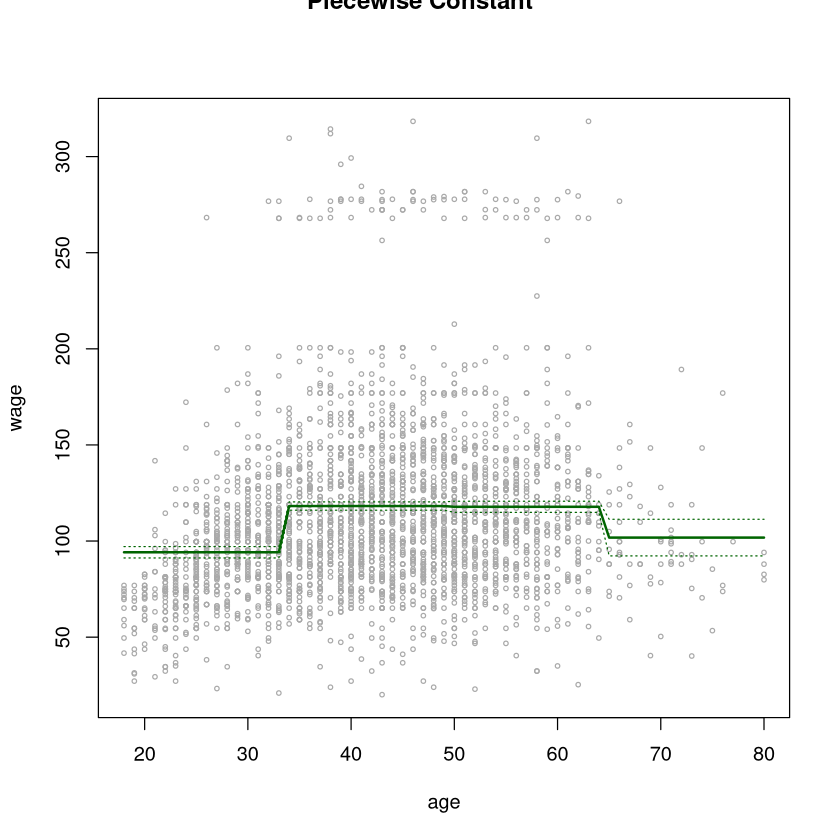

In [21]:
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Piecewise Constant", outer = T)
lines(age.grid, preds$fit, lwd = 2, col = "darkgreen")
matlines(age.grid, se.bands, lwd = 1, col = "darkgreen", lty = 3)

In [22]:
fit <- glm(I(wage > 250) ~ cut(age, 4), data = Wage,
    family = binomial)
preds <- predict(fit, newdata = list(age = age.grid), se = T)
pfit <- exp(preds$fit) / (1 + exp(preds$fit))
se.bands.logit <- cbind(preds$fit + 2 * preds$se.fit,
    preds$fit - 2 * preds$se.fit)
se.bands <- exp(se.bands.logit) / (1 + exp(se.bands.logit))

In [23]:
preds <- predict(fit, newdata = list(age = age.grid),
    type = "response", se = T)

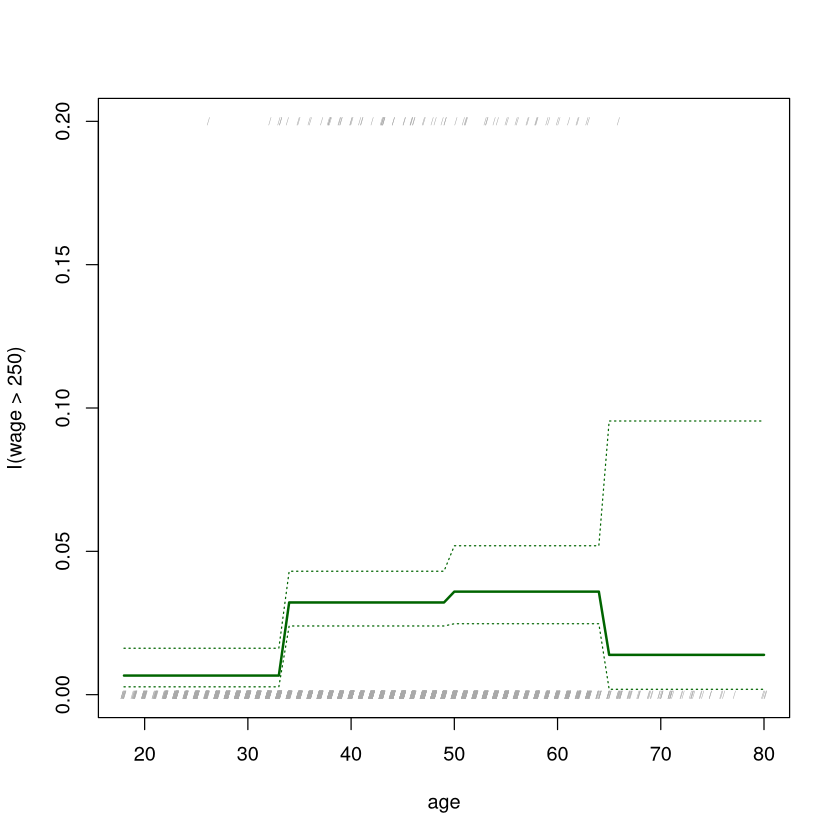

In [24]:
plot(age, I(wage > 250), xlim = agelims, type = "n",
    ylim = c(0, .2))
points(jitter(age), I((wage > 250) / 5), cex = .5, pch = "/",
    col = "darkgrey")
lines(age.grid, preds$fit, lwd = 2, col = "darkgreen")
matlines(age.grid, se.bands, lwd = 1, col = "darkgreen", lty = 3)